# Задание

### Основная часть

* Проанализируйте и опишите данный датасет, используя все возможные графики из тех, что были на уроке Matplotlib, Seaborn, Plotly
* Используйте также описательные статистики
* У каждого построенного графика должен быть соответствующий вывод, который описывает наблюдение или инсайт

# Описания полей

* age	возраст
* gender	пол repexc_date
* city_type	Тип города проживания клиента
* full_mob	Длительность взаимоотношений с банком

* ml_balance	ипотека
* cl_balance_0m	потребительский кредит
* loan_balance_0m	все кредиты

* td_balance_0m	депозит
* casa_balance_0m	счета

* dc_trx_cnt	количество трат по картам
* dc_trx_sum	сумма трат по картам
* Avg_trx	средний размер транзакции
* avgtrx_to_balance	


* min_casa_balance_1q	показатели по счетам за квартал
* max_casa_balance_1q	
* avg_casa_balance_1Y	показатели по счетам за год

* min_td_balance_1q	
* max_td_balance_1q	
* avg_td_balance_1Y

* min_loan_balance_1q	
* max_loan_balance_1q	
* avg_loan_balance_1Y

* min_cl_balance_1q	
* max_cl_balance_1q	
* avg_cl_balance_1Y	
* loan_to_deposit	

* income	доход клиента
* nbi	доход от клиента без OPEX

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from tqdm.auto import tqdm

In [3]:
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
df.head()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
0,71,NaN,<100,103,0.0,0.0,0.0,0.0,0.0000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,49,NaN,Mega,81,0.0,0.0,0.0,0.0,3272.9367,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,28.762952
2,56,NaN,Mega,81,0.0,0.0,0.0,0.0,6249.7550,6,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,854.67,0.083467,1973.335539
3,47,NaN,Mega,81,0.0,0.0,0.0,0.0,14354.9370,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,364.008556
4,74,NaN,Mega,81,0.0,0.0,0.0,0.0,91511.7691,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  50000 non-null  int64  
 1   gender               49277 non-null  object 
 2   city_type            50000 non-null  object 
 3   full_mob             50000 non-null  int64  
 4   ml_balance           50000 non-null  float64
 5   cl_balance_0m        50000 non-null  float64
 6   loan_balance_0m      50000 non-null  float64
 7   td_balance_0m        50000 non-null  float64
 8   casa_balance_0m      50000 non-null  float64
 9   dc_trx_cnt           50000 non-null  int64  
 10  dc_trx_sum           50000 non-null  float64
 11  income               50000 non-null  float64
 12  min_casa_balance_1q  50000 non-null  float64
 13  max_casa_balance_1q  50000 non-null  float64
 14  avg_casa_balance_1Y  50000 non-null  float64
 15  min_td_balance_1q    50000 non-null 

### Подготовка данных

In [5]:
# проверка и удаление дубликатов:
df.duplicated().sum()

26

In [6]:
df_1 = df.drop_duplicates()

In [7]:
df_1.duplicated().sum()

0

In [8]:
### удаляем строки с незаполненным полем "Пол"
df_1 = df_1[~df_1['gender'].isnull()]

### Анализ

In [9]:
df_1.groupby('gender')['age'].count()

gender
F    23863
М    25388
Name: age, dtype: int64

In [74]:
F = 23863/(23863+25388)*100
M = 25388/(23863+25388)*100

'% соотношение клиентов банка по полу: мужчины - ' + str(int(M*10)/10) + '%, женщины - ' + str(int(F*10)/10) + '%'

'% соотношение клиентов банка по полу: мужчины -51.5%, женщины - 48.4%'

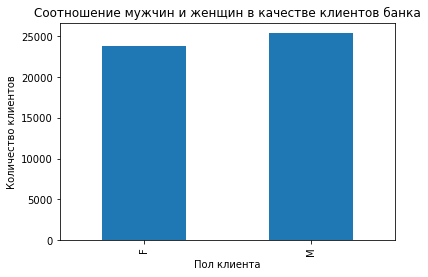

In [10]:
# Анализ клиентов по полу
cl_by_sex = df_1.groupby('gender')['age'].count()
cl_by_sex.plot(kind='bar') 
plt.title("Соотношение мужчин и женщин в качестве клиентов банка")
plt.ylabel('Количество клиентов')
plt.xlabel('Пол клиента')
plt.show()

#### Вывод: среди клиентов банка преобладают мужчины

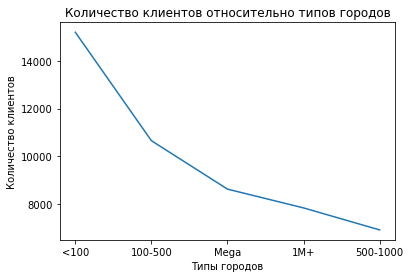

In [11]:
# количество клиентов относительно типов городов. 
 
city_clientage = df_1.groupby('city_type')['age'].count().sort_values(ascending=False)
plt.plot(city_clientage)
plt.title('Количество клиентов относительно типов городов')
plt.xlabel('Типы городов')
plt.ylabel('Количество клиентов')
plt.show()

#### Вывод: наибольшее количество клиентов банка в городах с населением менее 100 тыс.чел.

In [58]:
# Определение фичей для графиков
typical_features = ['age', 
                    'gender', 
                    'city_type', 
                    'dc_trx_cnt',
                    'dc_trx_sum', 
                    'loan_balance_0m',
                    'avg_td_balance_1Y',
                    'full_mob',
                    'income',
                    'Avg_trx',
                    'avgtrx_to_balance',
                    'ml_balance',
                    'nbi']
df_for_plot = df_1.loc[:, typical_features]

In [59]:
dict_features = {
    'dc_trx_cnt': 'количество трат по картам',
    'dc_trx_sum': 'сумма трат по картам',
    'loan_balance_0m': 'все кредиты',
    'avg_td_balance_1Y': 'средний депозит за год',
    'full_mob': 'Длительность взаимоотношений с банком',
    'income': 'доход клиента',
    'ml_balance': 'ипотека',
    'Avg_trx': 'средний размер транзакции',
    'avgtrx_to_balance': 'средний размер транзакции',
    'nbi': 'доход от клиента без OPEX'
}

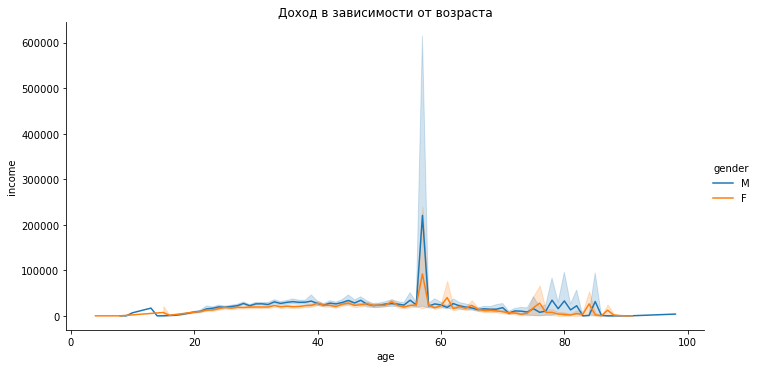

In [60]:
# Доход клиента в зависимости от возраста
sns.relplot(
    y='income', 
    x='age', 
    hue='gender',
    data=df_for_plot, 
    kind='line', 
    aspect=20/10
)
plt.title('Доход в зависимости от возраста')
plt.show()

#### Вывод: наибольший доход клиентов приносит возрастной сегмент 55-60 лет

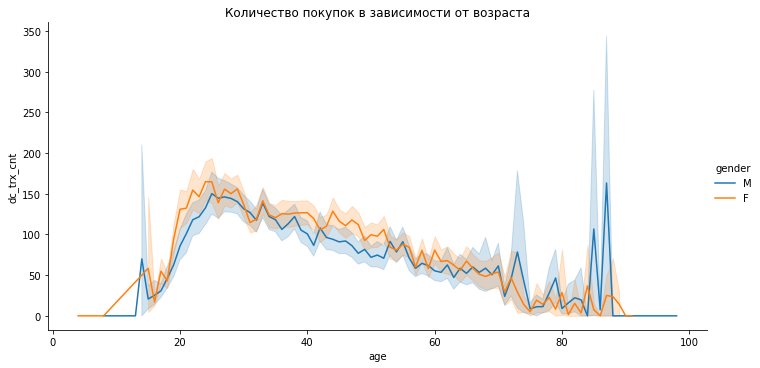

In [61]:
# Количество покупок в зависимости от возраста
sns.relplot(
    x='age', 
    y='dc_trx_cnt', 
    hue='gender', 
    data=df_for_plot, 
    #kind='line',
    kind='line',
    aspect=20/10)
plt.title('Количество покупок в зависимости от возраста');

#### Вывод: по количеству покупок лидирует возрастной сегмент 20-30 лет (примущественно женщины)

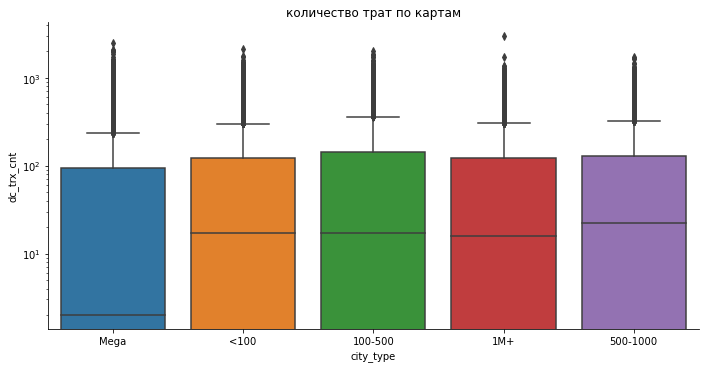

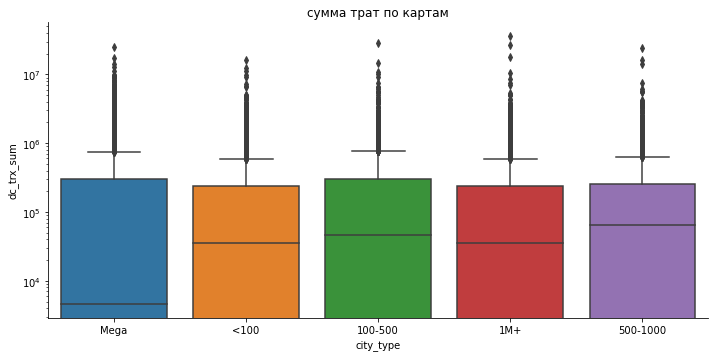

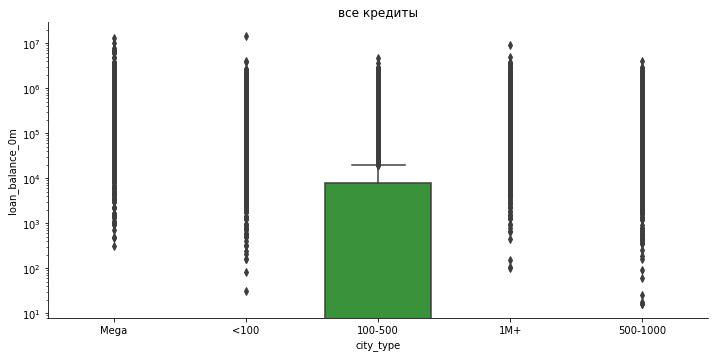

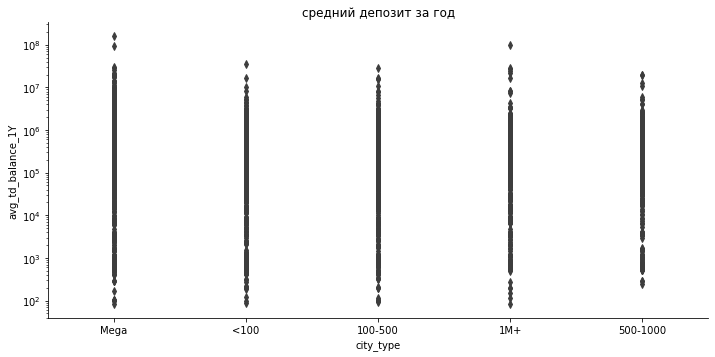

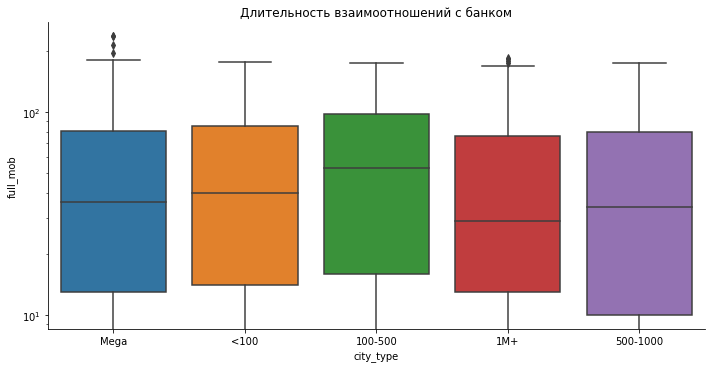

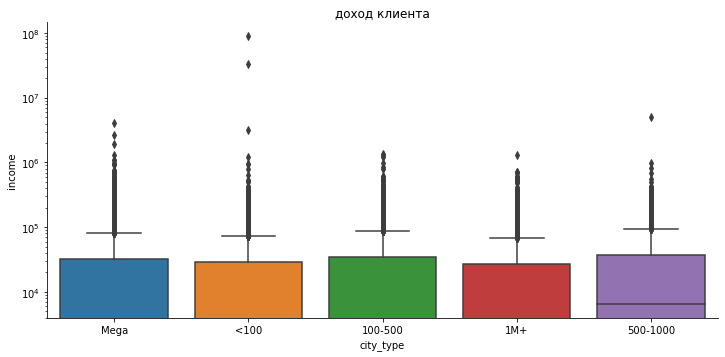

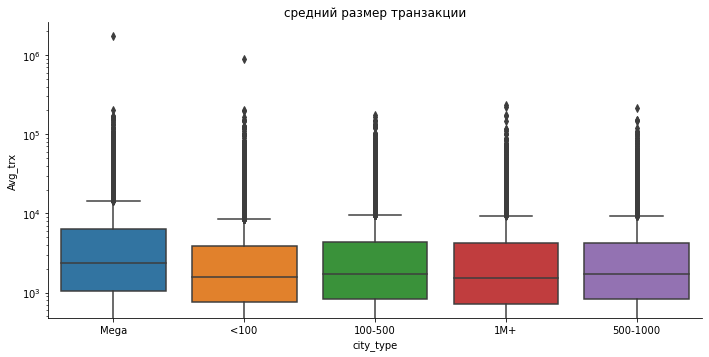

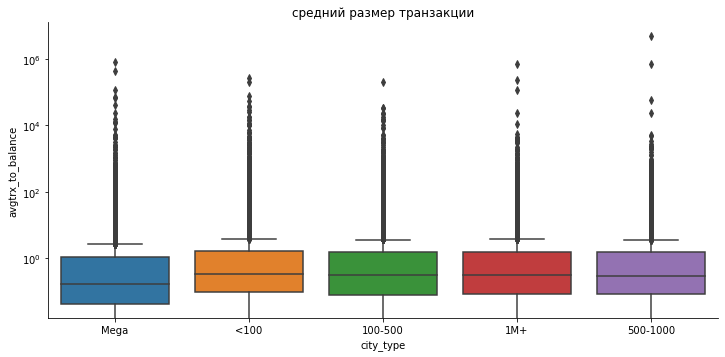

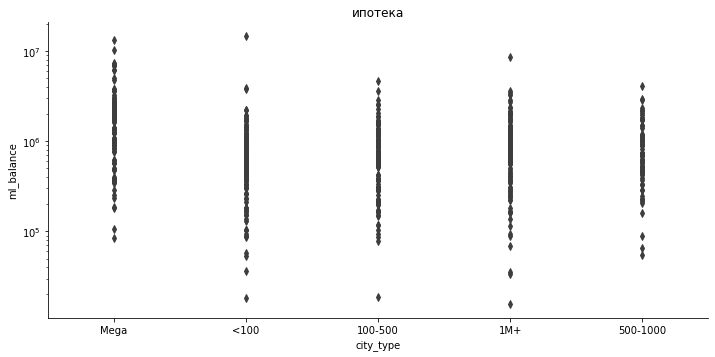

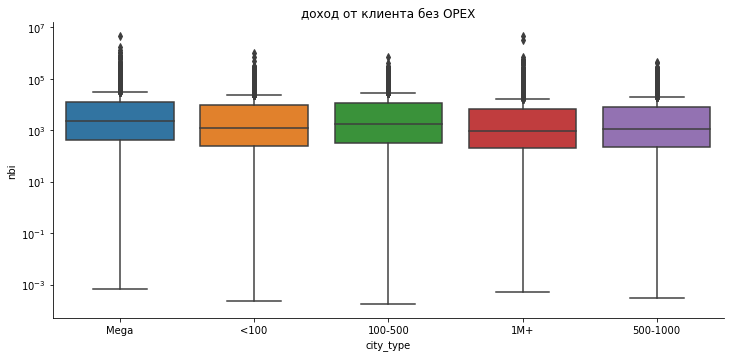

In [62]:
# графики для каждой фичи в разрезе городов

for feature in typical_features[3:]:
    sns.catplot(
        x='city_type', 
        y=feature, 
        data=df_for_plot, 
        kind='box', 
        height=5, 
        aspect=2
    ).set(yscale='log')
    plt.title(dict_features[feature])
    plt.show()

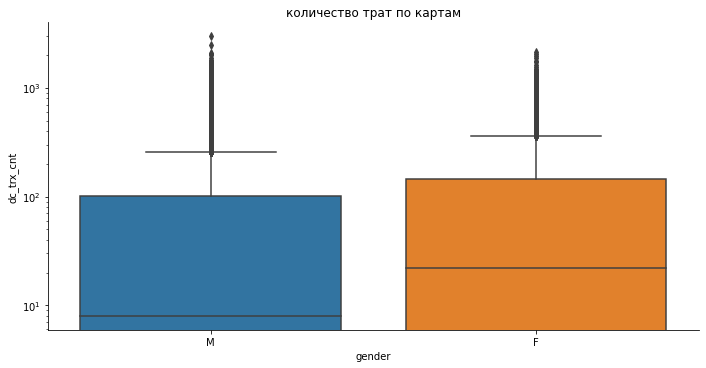

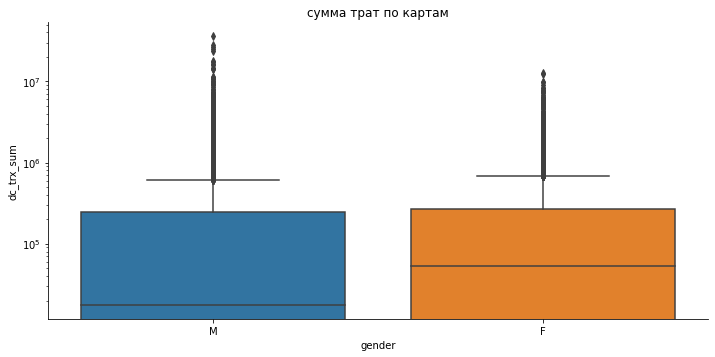

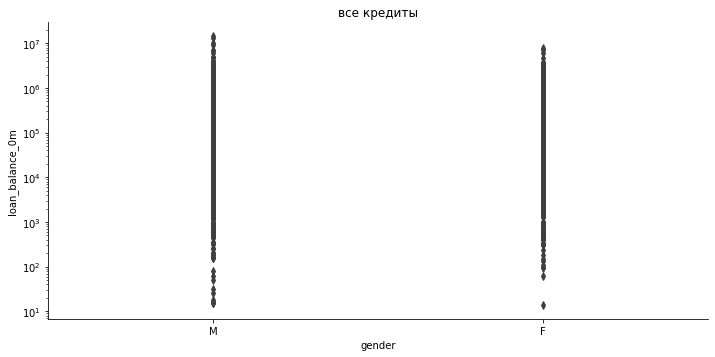

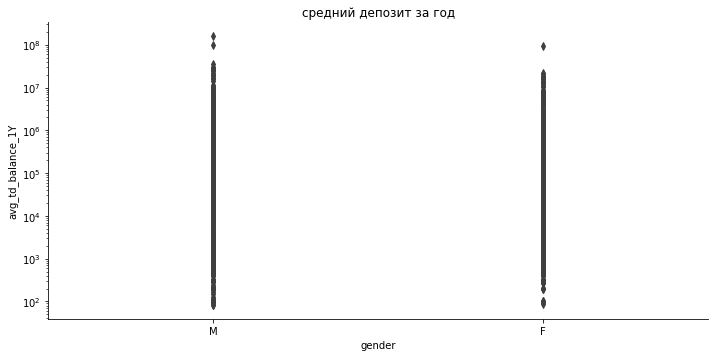

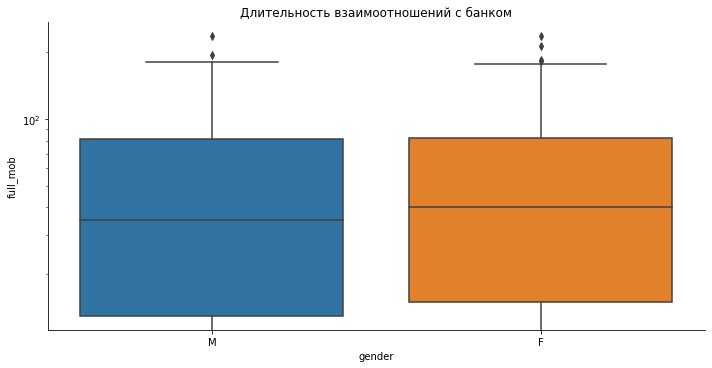

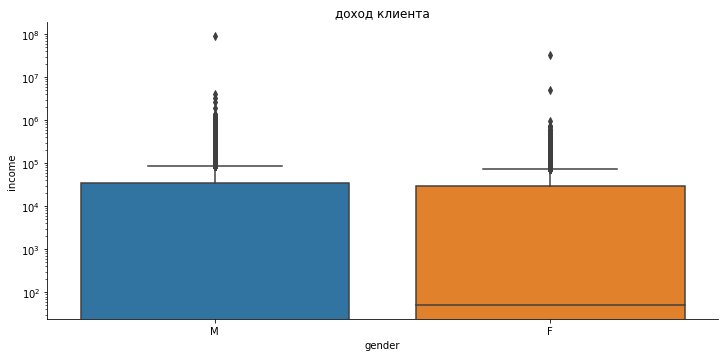

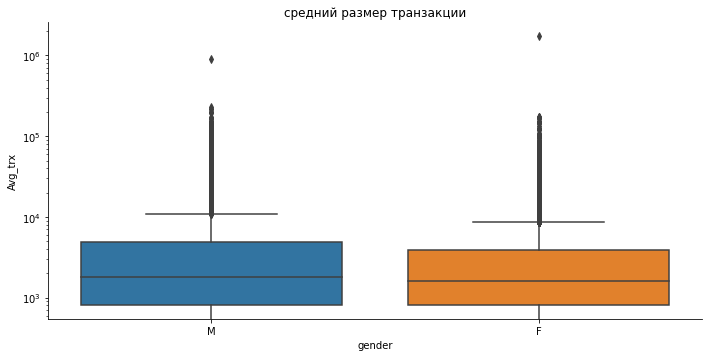

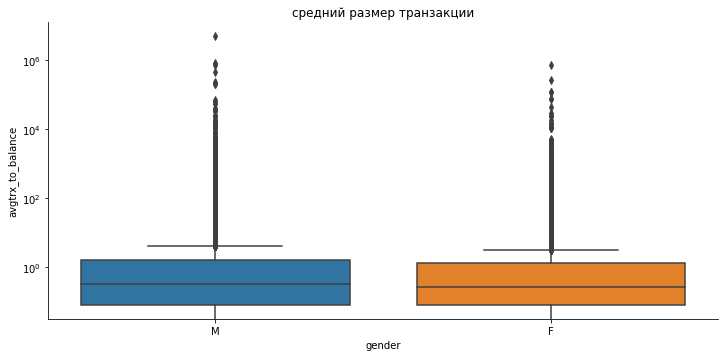

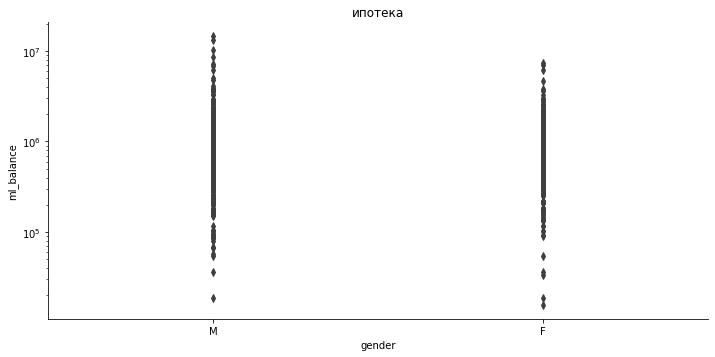

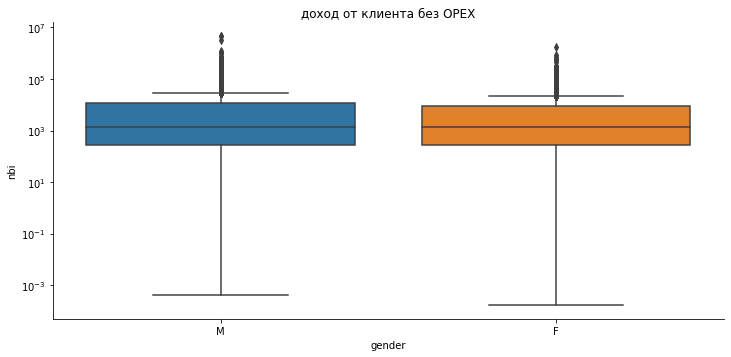

In [63]:
# графики для каждой фичи в разрезе пола

for feature in typical_features[3:]:
    sns.catplot(
        x='gender', 
        y=feature, 
        data=df_for_plot, 
        kind='box', 
        height=5, 
        aspect=2
    ).set(yscale='log')
    plt.title(dict_features[feature])
    plt.show()

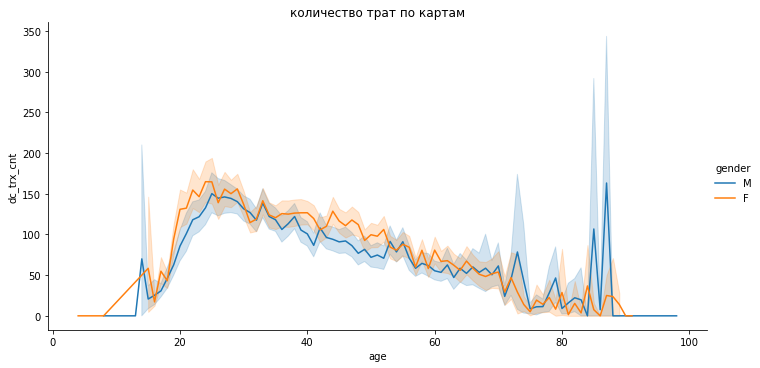

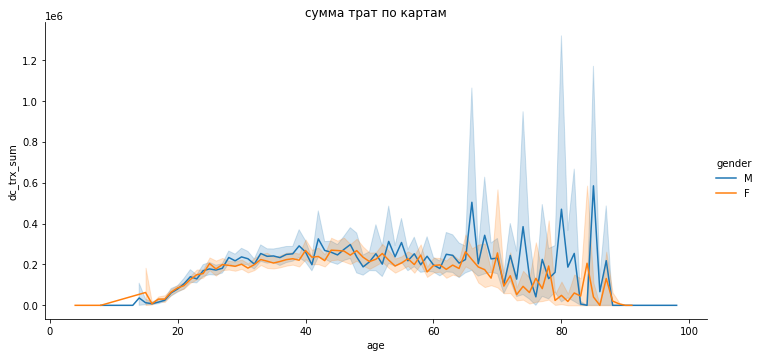

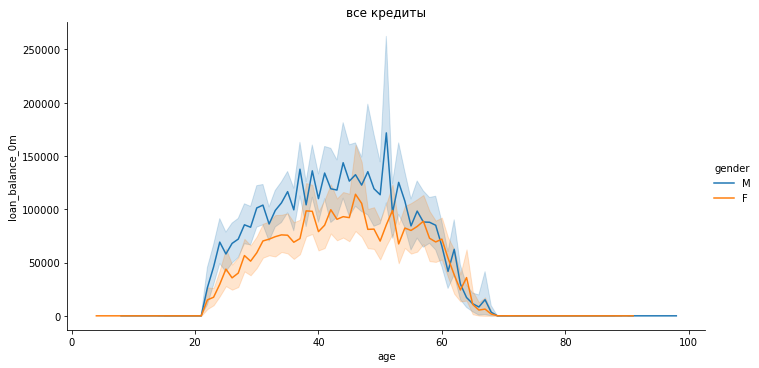

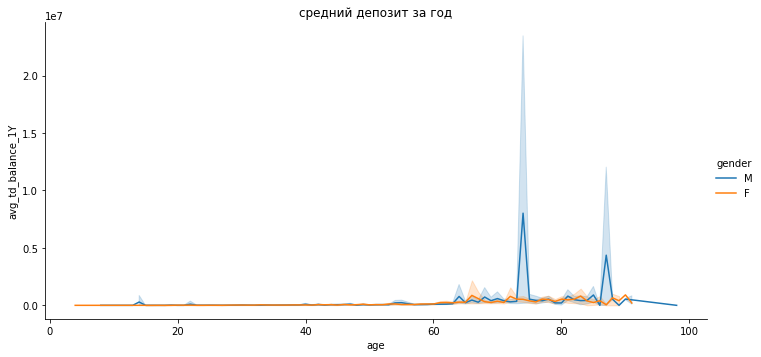

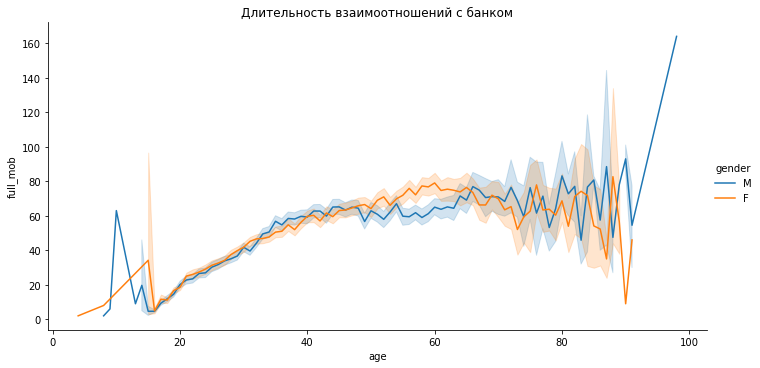

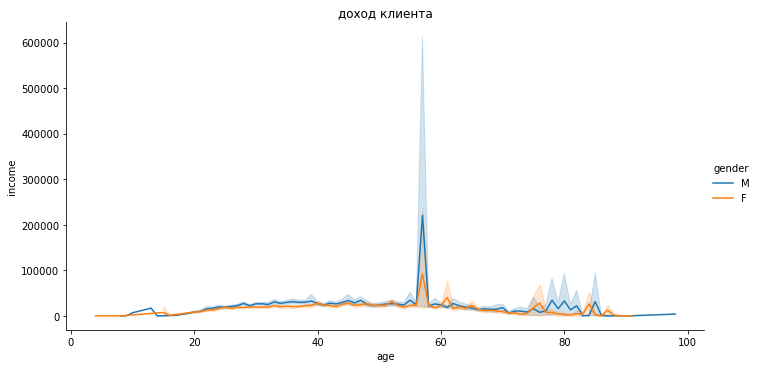

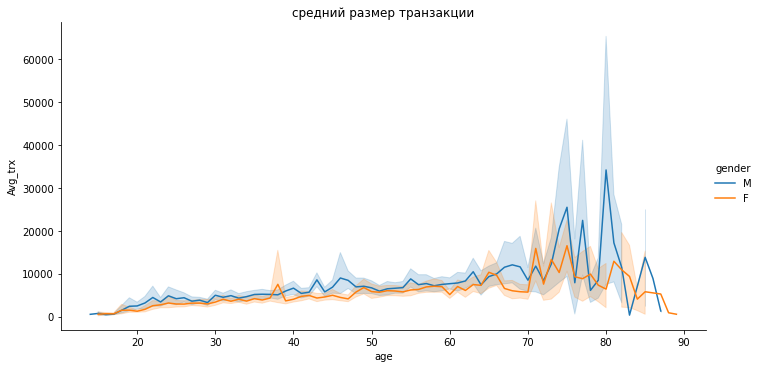

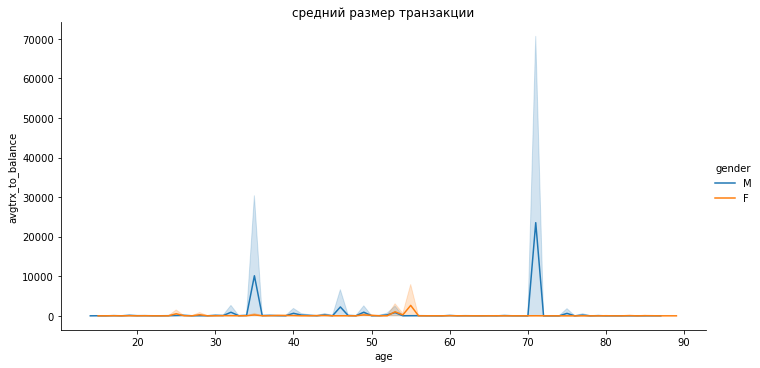

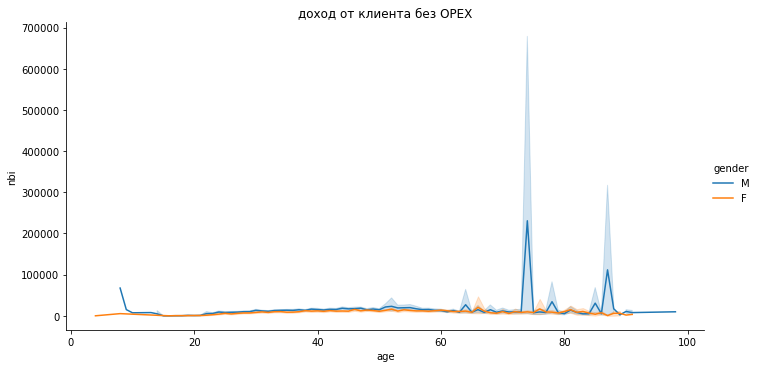

In [45]:
# графики для каждой фичи в разрезе возраста

for feature in typical_features[3:]:
    sns.relplot(
        x='age', 
        y=feature, 
        hue='gender', 
        data=df_for_plot, 
        kind='line',
        aspect=20/10)
    plt.title(dict_features[feature]);

<AxesSubplot:xlabel='city_type', ylabel='ml_balance'>

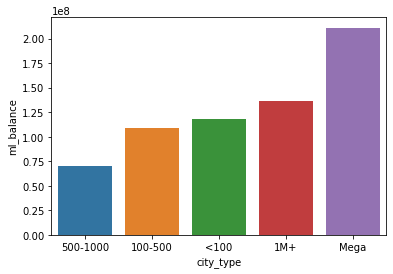

In [66]:
#объем ипотеки в зависимости от типа города

df_ip = df.groupby('city_type').sum()['ml_balance'].sort_values().reset_index()
df_ip

sns.barplot(
    data=df_ip,
    x ='city_type',
    y='ml_balance')


Общие результаты анализа:
* наибольшее количество клиентов располагается в городах с населением <100 тыс.чел.,
* в разрезе пола клиентов банка - мужчин - 51,5% и женщин - 48,4%,
* наибольший доход клиентов приносит возрастной сегмент 55-60 лет
* по количеству покупок лидирует возрастной сегмент 20-30 лет (примущественно женщины)
* дольше всего с банком взаимодействую клиенты, которые проживают в городах с населением в пределах 100-500 тыс.чел., на втором месте - < 100 тыс.чел.,
* минимальный кредитный баланс наиболее свойственен для женского пола
* наибольший доход банка от клиентов в городах с населением < 100 тыс.чел. и мегаполисов
* наибольший доход банк получает от мужчин проживающих в городах типа с населением < 100 тыс.чел. и от женщин проживающих в мегаполисах
* наибольший объем ипотеки - в мегаполисах
